In [ ]:
import json
from ds4se.mining.unsupervised.traceability import eda
import pandas as pd
from pathlib import Path
pd.set_option('max_colwidth',300)
from pprint import pprint
import re

ModuleNotFoundError: No module named 'ds4se.mining'

In [ ]:
#hide
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
# export
# Imports
import dit
import math
import os
import logging

import matplotlib.pyplot as plt
import pandas as pd
import sentencepiece as sp

from collections import Counter
from pathlib import Path
from scipy.stats import sem, t
from statistics import mean, median, stdev
from tqdm.notebook import tqdm

# ds4se
from ds4se.mgmnt.prep.bpe import *
from ds4se.exp.info import *
from ds4se.desc.stats import *

ModuleNotFoundError: No module named 'fastprogress'

In [ ]:
#export
import seaborn as sns
import numpy as np

In [ ]:
#export
from ds4se.desc.metrics import *
from ds4se.desc.metrics.java import *
import lizard
import chardet

In [ ]:
# default_exp mining.unsupervised.traceability.eda

# Exploratory Data Analysis for Software Traceability [EDA]
> Adapted from CodeSearchNet Challenge

In [ ]:
import json

import pandas as pd
from pathlib import Path
pd.set_option('max_colwidth',300)
from pprint import pprint
import re

In [ ]:
#hide
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
!pip install pyemd

## EDA for Word2Vec

In [ ]:
def default_params():
    return {
        'system':'CSB-CICDPipelineEdition-master',
        'saving_path': 'test_data/',
        'language': 'english'
    }

In [ ]:
params = default_params()

In [ ]:
word2vec_model = 

## Preview dataset

Download specific java dataset

In [ ]:
!wget https://s3.amazonaws.com/code-search-net/CodeSearchNet/v2/java.zip

--2020-05-24 21:32:35--  https://s3.amazonaws.com/code-search-net/CodeSearchNet/v2/java.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.79.38
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.79.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1060569153 (1011M) [application/zip]
Saving to: ‘java.zip’

java.zip            100%[===================>]   1011M  11.3MB/s    in 92s     

2020-05-24 21:34:08 (11.0 MB/s) - ‘java.zip’ saved [1060569153/1060569153]



In [ ]:
!unzip java.zip

Archive:  java.zip
   creating: java/
   creating: java/final/
   creating: java/final/jsonl/
   creating: java/final/jsonl/train/
  inflating: java/final/jsonl/train/java_train_12.jsonl.gz  
  inflating: java/final/jsonl/train/java_train_9.jsonl.gz  
  inflating: java/final/jsonl/train/java_train_3.jsonl.gz  
  inflating: java/final/jsonl/train/java_train_5.jsonl.gz  
  inflating: java/final/jsonl/train/java_train_7.jsonl.gz  
  inflating: java/final/jsonl/train/java_train_1.jsonl.gz  
  inflating: java/final/jsonl/train/java_train_10.jsonl.gz  
  inflating: java/final/jsonl/train/java_train_14.jsonl.gz  
  inflating: java/final/jsonl/train/java_train_0.jsonl.gz  
  inflating: java/final/jsonl/train/java_train_6.jsonl.gz  
  inflating: java/final/jsonl/train/java_train_8.jsonl.gz  
  inflating: java/final/jsonl/train/java_train_15.jsonl.gz  
  inflating: java/final/jsonl/train/java_train_2.jsonl.gz  
  inflating: java/final/jsonl/train/java_train_4.jsonl.gz  
  inflating: java/final/j

In [ ]:
!gzip -d java/final/jsonl/test/java_test_0.jsonl.gz

In [ ]:
with open('test_data/java/final/jsonl/test/java_test_0.jsonl', 'r') as f:
    sample_file = f.readlines()
sample_file[0]

'{"repo": "ReactiveX/RxJava", "path": "src/main/java/io/reactivex/internal/observers/QueueDrainObserver.java", "func_name": "QueueDrainObserver.fastPathOrderedEmit", "original_string": "protected final void fastPathOrderedEmit(U value, boolean delayError, Disposable disposable) {\\n        final Observer<? super V> observer = downstream;\\n        final SimplePlainQueue<U> q = queue;\\n\\n        if (wip.get() == 0 && wip.compareAndSet(0, 1)) {\\n            if (q.isEmpty()) {\\n                accept(observer, value);\\n                if (leave(-1) == 0) {\\n                    return;\\n                }\\n            } else {\\n                q.offer(value);\\n            }\\n        } else {\\n            q.offer(value);\\n            if (!enter()) {\\n                return;\\n            }\\n        }\\n        QueueDrainHelper.drainLoop(q, observer, delayError, disposable, this);\\n    }", "language": "java", "code": "protected final void fastPathOrderedEmit(U value, boolean d

In [ ]:
print(type(sample_file))
print(len(sample_file))

<class 'list'>
26909


In [ ]:
pprint(json.loads(sample_file[0]))

{'code': 'protected final void fastPathOrderedEmit(U value, boolean '
         'delayError, Disposable disposable) {\n'
         '        final Observer<? super V> observer = downstream;\n'
         '        final SimplePlainQueue<U> q = queue;\n'
         '\n'
         '        if (wip.get() == 0 && wip.compareAndSet(0, 1)) {\n'
         '            if (q.isEmpty()) {\n'
         '                accept(observer, value);\n'
         '                if (leave(-1) == 0) {\n'
         '                    return;\n'
         '                }\n'
         '            } else {\n'
         '                q.offer(value);\n'
         '            }\n'
         '        } else {\n'
         '            q.offer(value);\n'
         '            if (!enter()) {\n'
         '                return;\n'
         '            }\n'
         '        }\n'
         '        QueueDrainHelper.drainLoop(q, observer, delayError, '
         'disposable, this);\n'
         '    }',
 'code_tokens': ['pr

## Exploring the full DataSet

In [ ]:
!ls test_data/java/

_sp_bpe_modal.model  _sp_bpe_modal.vocab  final  text.txt


In [ ]:
java_files = sorted(Path('test_data/java/').glob('**/*.gz'))

In [ ]:
print('Total of related java files: {}'.format(len(java_files)))

Total of related java files: 17


In [ ]:
java_df = jsonl_list_to_dataframe(java_files)

In [ ]:
java_df.head()

,repo,path,url,code,code_tokens,docstring,docstring_tokens,language,partition
0,spring-projects/spring-boot,spring-boot-project/spring-boot/src/main/java/org/springframework/boot/context/properties/bind/IndexedElementsBinder.java,https://github.com/spring-projects/spring-boot/blob/0b27f7c70e164b2b1a96477f1d9c1acba56790c1/spring-boot-project/spring-boot/src/main/java/org/springframework/boot/context/properties/bind/IndexedElementsBinder.java#L67-L77,"protected final void bindIndexed(ConfigurationPropertyName name, Bindable<?> target,\n\t\t\tAggregateElementBinder elementBinder, ResolvableType aggregateType,\n\t\t\tResolvableType elementType, IndexedCollectionSupplier result) {\n\t\tfor (ConfigurationPropertySource source : getContext().getSo...","[protected, final, void, bindIndexed, (, ConfigurationPropertyName, name, ,, Bindable, <, ?, >, target, ,, AggregateElementBinder, elementBinder, ,, ResolvableType, aggregateType, ,, ResolvableType, elementType, ,, IndexedCollectionSupplier, result, ), {, for, (, ConfigurationPropertySource, sou...","Bind indexed elements to the supplied collection.\n@param name the name of the property to bind\n@param target the target bindable\n@param elementBinder the binder to use for elements\n@param aggregateType the aggregate type, may be a collection or an array\n@param elementType the element type\n...","[Bind, indexed, elements, to, the, supplied, collection, .]",java,train
1,spring-projects/spring-boot,spring-boot-project/spring-boot/src/main/java/org/springframework/boot/web/servlet/AbstractFilterRegistrationBean.java,https://github.com/spring-projects/spring-boot/blob/0b27f7c70e164b2b1a96477f1d9c1acba56790c1/spring-boot-project/spring-boot/src/main/java/org/springframework/boot/web/servlet/AbstractFilterRegistrationBean.java#L75-L80,"public void setServletRegistrationBeans(\n\t\t\tCollection<? extends ServletRegistrationBean<?>> servletRegistrationBeans) {\n\t\tAssert.notNull(servletRegistrationBeans,\n\t\t\t\t""ServletRegistrationBeans must not be null"");\n\t\tthis.servletRegistrationBeans = new LinkedHashSet<>(servletRegist...","[public, void, setServletRegistrationBeans, (, Collection, <, ?, extends, ServletRegistrationBean, <, ?, >, >, servletRegistrationBeans, ), {, Assert, ., notNull, (, servletRegistrationBeans, ,, ""ServletRegistrationBeans must not be null"", ), ;, this, ., servletRegistrationBeans, =, new, LinkedH...",Set {@link ServletRegistrationBean}s that the filter will be registered against.\n@param servletRegistrationBeans the Servlet registration beans,"[Set, {]",java,train
2,spring-projects/spring-boot,spring-boot-project/spring-boot/src/main/java/org/springframework/boot/web/servlet/AbstractFilterRegistrationBean.java,https://github.com/spring-projects/spring-boot/blob/0b27f7c70e164b2b1a96477f1d9c1acba56790c1/spring-boot-project/spring-boot/src/main/java/org/springframework/boot/web/servlet/AbstractFilterRegistrationBean.java#L98-L103,"public void addServletRegistrationBeans(\n\t\t\tServletRegistrationBean<?>... servletRegistrationBeans) {\n\t\tAssert.notNull(servletRegistrationBeans,\n\t\t\t\t""ServletRegistrationBeans must not be null"");\n\t\tCollections.addAll(this.servletRegistrationBeans, servletRegistrationBeans);\n\t}","[public, void, addServletRegistrationBeans, (, ServletRegistrationBean, <, ?, >, ..., servletRegistrationBeans, ), {, Assert, ., notNull, (, servletRegistrationBeans, ,, ""ServletRegistrationBeans must not be null"", ), ;, Collections, ., addAll, (, this, ., servletRegistrationBeans, ,, servletReg...",Add {@link ServletRegistrationBean}s for the filter.\n@param servletRegistrationBeans the servlet registration beans to add\n@see #setServletRegistrationBeans,"[Add, {]",java,train
3,spring-projects/spring-boot,spring-boot-project/spring-boot/src/main/java/org/springframework/boot/web/servlet/AbstractFilterRegistrationBean.java,https://github.com/spring-projects/spring-boot/blob/0b27f7c70e164b2b1a96477f1d9c1acba56790c1/spring-boot-project/spring-bo

## Summary stats.

In [ ]:
java_df.partition.value_counts()

train    454451
valid     15328
Name: partition, dtype: int64

In [ ]:
java_df.groupby(['partition', 'language'])['code_tokens'].count()

partition  language
train      java        454451
valid      java         15328
Name: code_tokens, dtype: int64

In [ ]:
java_df['code_len'] = java_df.code_tokens.apply(lambda x: len(x))
java_df['query_len'] = java_df.docstring_tokens.apply(lambda x: len(x))

Tokens Length Percentile 

In [ ]:
code_len_summary = java_df.groupby('language')['code_len'].quantile([.5, .7, .8, .9, .95])

In [ ]:
display(pd.DataFrame(code_len_summary))

code_len
language               
java     0.50      66.0
         0.70     104.0
         0.80     142.0
         0.90     224.0
         0.95     330.0

Query length percentile by language

In [ ]:
query_len_summary = java_df.groupby('language')['query_len'].quantile([.5, .7, .8, .9, .95])
display(pd.DataFrame(query_len_summary))

query_len
language                
java     0.50       11.0
         0.70       18.0
         0.80       25.0
         0.90       39.0
         0.95       60.0

In [ ]:
java_df = java_df[java_df['partition'] == 'train']

In [ ]:
java_df.shape

(454451, 11)

## Data transformation

In [ ]:
java_df.columns

Index(['repo', 'path', 'url', 'code', 'code_tokens', 'docstring',
       'docstring_tokens', 'language', 'partition', 'code_len', 'query_len'],
      dtype='object')

In [ ]:
java_df.shape

(454451, 11)

In [ ]:
src_code_columns = ['code', 'code_tokens', 'code_len']

In [ ]:
java_src_code_df = java_df[src_code_columns]

In [ ]:
java_src_code_df.shape

(454451, 4)

Visualizing an example

In [ ]:
java_src_code_df[:10]['code']

0    protected final void bindIndexed(ConfigurationPropertyName name, Bindable<?> target,\n\t\t\tAggregateElementBinder elementBinder, ResolvableType aggregateType,\n\t\t\tResolvableType elementType, IndexedCollectionSupplier result) {\n\t\tfor (ConfigurationPropertySource source : getContext().getSo...
1    public void setServletRegistrationBeans(\n\t\t\tCollection<? extends ServletRegistrationBean<?>> servletRegistrationBeans) {\n\t\tAssert.notNull(servletRegistrationBeans,\n\t\t\t\t"ServletRegistrationBeans must not be null");\n\t\tthis.servletRegistrationBeans = new LinkedHashSet<>(servletRegist...
2          public void addServletRegistrationBeans(\n\t\t\tServletRegistrationBean<?>... servletRegistrationBeans) {\n\t\tAssert.notNull(servletRegistrationBeans,\n\t\t\t\t"ServletRegistrationBeans must not be null");\n\t\tCollections.addAll(this.servletRegistrationBeans, servletRegistrationBeans);\n\t}
3                                                                                    

In [ ]:
java_src_code_df.shape

(454451, 3)

In [ ]:
data_type_new_column = ['src' for x in range(java_src_code_df.shape[0])]

In [ ]:
len(data_type_new_column)

454451

In [ ]:
java_src_code_df.loc[:,'data_type'] = data_type_new_column

In [ ]:
java_src_code_df.head()

,code,code_tokens,code_len,data_type
0,"protected final void bindIndexed(ConfigurationPropertyName name, Bindable<?> target,\n\t\t\tAggregateElementBinder elementBinder, ResolvableType aggregateType,\n\t\t\tResolvableType elementType, IndexedCollectionSupplier result) {\n\t\tfor (ConfigurationPropertySource source : getContext().getSo...","[protected, final, void, bindIndexed, (, ConfigurationPropertyName, name, ,, Bindable, <, ?, >, target, ,, AggregateElementBinder, elementBinder, ,, ResolvableType, aggregateType, ,, ResolvableType, elementType, ,, IndexedCollectionSupplier, result, ), {, for, (, ConfigurationPropertySource, sou...",80,src
1,"public void setServletRegistrationBeans(\n\t\t\tCollection<? extends ServletRegistrationBean<?>> servletRegistrationBeans) {\n\t\tAssert.notNull(servletRegistrationBeans,\n\t\t\t\t""ServletRegistrationBeans must not be null"");\n\t\tthis.servletRegistrationBeans = new LinkedHashSet<>(servletRegist...","[public, void, setServletRegistrationBeans, (, Collection, <, ?, extends, ServletRegistrationBean, <, ?, >, >, servletRegistrationBeans, ), {, Assert, ., notNull, (, servletRegistrationBeans, ,, ""ServletRegistrationBeans must not be null"", ), ;, this, ., servletRegistrationBeans, =, new, LinkedH...",37,src
2,"public void addServletRegistrationBeans(\n\t\t\tServletRegistrationBean<?>... servletRegistrationBeans) {\n\t\tAssert.notNull(servletRegistrationBeans,\n\t\t\t\t""ServletRegistrationBeans must not be null"");\n\t\tCollections.addAll(this.servletRegistrationBeans, servletRegistrationBeans);\n\t}","[public, void, addServletRegistrationBeans, (, ServletRegistrationBean, <, ?, >, ..., servletRegistrationBeans, ), {, Assert, ., notNull, (, servletRegistrationBeans, ,, ""ServletRegistrationBeans must not be null"", ), ;, Collections, ., addAll, (, this, ., servletRegistrationBeans, ,, servletReg...",33,src
3,"public void setServletNames(Collection<String> servletNames) {\n\t\tAssert.notNull(servletNames, ""ServletNames must not be null"");\n\t\tthis.servletNames = new LinkedHashSet<>(servletNames);\n\t}","[public, void, setServletNames, (, Collection, <, String, >, servletNames, ), {, Assert, ., notNull, (, servletNames, ,, ""ServletNames must not be null"", ), ;, this, ., servletNames, =, new, LinkedHashSet, <>, (, servletNames, ), ;, }]",32,src
4,"public void addServletNames(String... servletNames) {\n\t\tAssert.notNull(servletNames, ""ServletNames must not be null"");\n\t\tthis.servletNames.addAll(Arrays.asList(servletNames));\n\t}","[public, void, addServletNames, (, String, ..., servletNames, ), {, Assert, ., notNull, (, servletNames, ,, ""ServletNames must not be null"", ), ;, this, ., servletNames, ., addAll, (, Arrays, ., asList, (, servletNames, ), ), ;, }]",33,src


In [ ]:
waka =  java_src_code_df.sample(100)

In [ ]:
java_src_code_df.shape

(454451, 4)

In [ ]:
waka = get_valid_code_df(java_src_code_df, 'code')

In [ ]:
waka.shape

(454451, 4)

In [ ]:
type(java_code_df['code'][9071])

pandas.core.series.Series

In [ ]:
java_code_df['code'][9071]

9071    public Job withOutputGroupDetails(OutputGroupDetail... outputGroupDetails) {\n        if (this.outputGroupDetails == null) {\n            setOutputGroupDetails(new java.util.ArrayList<OutputGroupDetail>(outputGroupDetails.length));\n        }\n        for (OutputGroupDetail ele : outputGroupDeta...
9071                                                                           void collectVertices(final List<ManagementVertex> vertices) {\n\n\t\tfinal Iterator<ManagementGroupVertex> it = this.groupVertices.iterator();\n\n\t\twhile (it.hasNext()) {\n\t\t\tit.next().collectVertices(vertices);\n\t\t}\n\t}
Name: code, dtype: object

In [ ]:
java_path = Path('test_data/java/')

In [ ]:
sp_model_from_df(java_src_code_df, output=java_path, model_name='_sp_bpe_modal', cols=['code'])

In [ ]:
sp_processor = sp.SentencePieceProcessor()
sp_processor.Load(f"{java_path/'_sp_bpe_modal'}.model")

True

In [ ]:
java_src_code_df.shape

(469779, 4)

In [ ]:
n_sample_4_sp = int(java_src_code_df.shape[0]*0.01)
print(n_sample_4_sp)

4697


In [ ]:
java_code_df = java_src_code_df.sample(n=n_sample_4_sp)

In [ ]:
java_code_df.shape

(4697, 4)

In [ ]:
# Use the model to compute each file's entropy
java_doc_entropies = get_doc_entropies_from_df(java_code_df, 'code', java_path/'_sp_bpe_modal', ['src'])

In [ ]:
Rsa

4.5465935642949376


In [ ]:
# Use the model to compute each file's entropy
java_corpus_entropies = get_corpus_entropies_from_df(java_code_df, 'code', path/'_sp_bpe_modal', ['src'])

In [ ]:
java_corpus_entropies

[9.12643213185743]

In [ ]:
# Use the model to compute each file's entropy
java_system_entropy = get_system_entropy_from_df(java_code_df, 'code', path/'_sp_bpe_modal')

In [ ]:
java_system_entropy

9.12643213185743

In [ ]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [ ]:
report_stats(flatten(java_doc_entropies))

Max: 7.78334225813108
Min: 3.6022695319771243
Average: 5.308350682648045
Median: 5.240168898701707
Standard Deviation: 0.6424560805108003
Median Absolute Deviation: 0.6519888266752955
95% of the data fall within 5.289972895999806 and 5.326728469296284


In [ ]:
java_doc_entropies

[[5.245495612143854,
  4.5465935642949376,
  5.427446404550867,
  5.548809467523613,
  4.098944003766904,
  5.336063656722613,
  4.9703592063004995,
  5.140435164679311,
  5.991590579348163,
  5.101954821031465,
  5.930929782121024,
  5.808644613050604,
  6.367948328773435,
  4.738902979727636,
  5.245910493123257,
  6.5950826310591335,
  6.630195276187333,
  4.697893904731035,
  5.44832008034993,
  6.006204499748509,
  5.557894788657961,
  4.764590566193039,
  5.093533079133442,
  4.3246987351738495,
  4.930473992176587,
  5.191965003168265,
  5.207992076411221,
  4.4946803684089085,
  5.637212067575417,
  5.072894630970412,
  4.245469029158445,
  6.895436353131755,
  5.855849171427602,
  5.022591527173781,
  5.40828994872828,
  6.026890331328987,
  4.65905679781665,
  4.7077148025974385,
  4.700025464432734,
  4.467625290959291,
  5.710631932445386,
  5.441453549262331,
  5.185230132909401,
  5.838755811719876,
  7.292381930651894,
  4.979437446961112,
  5.419877355035609,
  5.278463

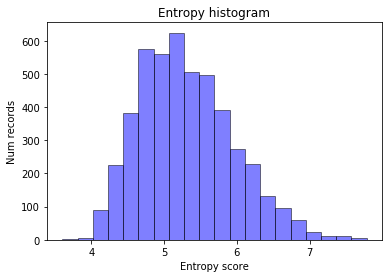

In [ ]:
# Create a histogram of the entropy distribution
plt.hist(java_doc_entropies,bins = 20, color="blue", alpha=0.5, edgecolor="black", linewidth=1.0)
plt.title('Entropy histogram')
plt.ylabel("Num records")
plt.xlabel("Entropy score")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0d9340f240>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0d9340f8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0d93402e80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0d9340ff60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0d934182e8>],
 'means': []}

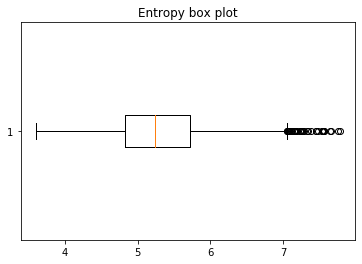

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Entropy box plot')
ax1.boxplot(java_doc_entropies, vert=False)

In [ ]:
java_code_df.head(1)

,code,code_tokens,code_len,data_type
4763,public void setCurrentObject(Object obj) {\n if (((obj == null) && (this.nullString != null))\n || this.requiredType.isInstance(obj)\n || (obj instanceof String)\n || (obj instanceof File)\n || ((obj instanceof Task) && this.requ...,"[public, void, setCurrentObject, (, Object, obj, ), {, if, (, (, (, obj, ==, null, ), &&, (, this, ., nullString, !=, null, ), ), ||, this, ., requiredType, ., isInstance, (, obj, ), ||, (, obj, instanceof, String, ), ||, (, obj, instanceof, File, ), ||, (, (, obj, instanceof, Task, ), &&, this,...",92,src


In [ ]:
test_src_code = java_code_df['code'].values[0]

In [ ]:
print(test_src_code)

public void setCurrentObject(Object obj) {
        if (((obj == null) && (this.nullString != null))
                || this.requiredType.isInstance(obj)
                || (obj instanceof String)
                || (obj instanceof File)
                || ((obj instanceof Task) && this.requiredType.isAssignableFrom(((Task) obj).getTaskResultType()))) {
            this.currentValue = obj;
        } else {
            throw new IllegalArgumentException("Object not of required type.");
        }
    }


Sample of available metrics (for method level)

In [ ]:
metrics = lizard.analyze_file.analyze_source_code('test.java', test_src_code)

In [ ]:
func = metrics.function_list[0]
print('cyclomatic_complexity: {}'.format(func.cyclomatic_complexity))
print('nloc (length): {}'.format(func.length))
print('nloc: {}'.format(func.nloc))
print('parameter_count: {}'.format(func.parameter_count))
print('name: {}'.format(func.name))
print('token_count {}'.format(func.token_count))
print('long_name: {}'.format(func.long_name))

cyclomatic_complexity: 8
nloc (length): 11
nloc: 11
parameter_count: 1
name: setCurrentObject
token_count 90
long_name: setCurrentObject( Object obj)


In [ ]:
java_code_df.shape

(4697, 4)

In [ ]:
code_df = add_method_mccabe_metrics_to_code_df(java_code_df, 'code')

In [ ]:
code_df.shape

(4697, 9)

In [ ]:
code_df.head()

,code,code_tokens,code_len,data_type,cyclomatic_complexity,nloc,parameter_count,method_name,token_count
348,"protected void unsetAuthDataService(ServiceReference<AuthDataService> ref) {\n if (TraceComponent.isAnyTracingEnabled() && tc.isDebugEnabled())\n Tr.debug(tc, ""unsetAuthDataService"", ref);\n authDataServiceRef.unsetReference(ref);\n }","[protected, void, unsetAuthDataService, (, ServiceReference, <, AuthDataService, >, ref, ), {, if, (, TraceComponent, ., isAnyTracingEnabled, (, ), &&, tc, ., isDebugEnabled, (, ), ), Tr, ., debug, (, tc, ,, ""unsetAuthDataService"", ,, ref, ), ;, authDataServiceRef, ., unsetReference, (, ref, ), ...",44,src,3,5,1,unsetAuthDataService,42
5389,"@Override\n protected void deltaStartWorkAccepted()\n {\n if (trace)\n log.trace(""deltaStartWorkAccepted"");\n\n super.deltaStartWorkAccepted();\n\n if (distributedStatisticsEnabled && distributedStatistics != null && transport != null)\n {\n try\n ...","[@, Override, protected, void, deltaStartWorkAccepted, (, ), {, if, (, trace, ), log, ., trace, (, ""deltaStartWorkAccepted"", ), ;, super, ., deltaStartWorkAccepted, (, ), ;, if, (, distributedStatisticsEnabled, &&, distributedStatistics, !=, null, &&, transport, !=, null, ), {, try, {, checkTran...",75,src,6,18,0,deltaStartWorkAccepted,71
10500,"private void validateBlockSize(byte[] descriptor) throws IOException {\n int blockSize = Util.getUInt16Both(descriptor, 129);\n if (blockSize != Constants.DEFAULT_BLOCK_SIZE) {\n throw new LoopFileSystemException(""Invalid block size: "" + blockSize);\n }\n }","[private, void, validateBlockSize, (, byte, [, ], descriptor, ), throws, IOException, {, int, blockSize, =, Util, ., getUInt16Both, (, descriptor, ,, 129, ), ;, if, (, blockSize, !=, Constants, ., DEFAULT_BLOCK_SIZE, ), {, throw, new, LoopFileSystemException, (, ""Invalid block size: "", +, blockS...",44,src,2,6,1,validateBlockSize,42
7146,public PooledConnection getConnection(long wait) throws SQLException {\r\n\t\ttry {\r\n\t\t\treturn getConnectionDirect();\r\n\t\t} catch (Exception e) {\r\n\t\t\tThreadUtil.sleep(wait);\r\n\t\t}\r\n\t\treturn getConnectionDirect();\r\n\t},"[public, PooledConnection, getConnection, (, long, wait, ), throws, SQLException, {, try, {, return, getConnectionDirect, (, ), ;, }, catch, (, Exception, e, ), {, ThreadUtil, ., sleep, (, wait, ), ;, }, return, getConnectionDirect, (, ), ;, }]",38,src,2,8,1,getConnection,36
14642,"public boolean addSnomedId(final Candidate candidate) throws SQLException {\n final SnomedTerm result = findFromCuiAndDesc(candidate.getCandidateCUI(), candidate.getCandidatePreferred());\n if (result != null) {\n candidate.setSnomedId(result.snomedId);\n cand...","[public, boolean, addSnomedId, (, final, Candidate, candidate, ), throws, SQLException, {, final, SnomedTerm, result, =, findFromCuiAndDesc, (, candidate, ., getCandidateCUI, (, ), ,, candidate, ., getCandidatePreferred, (, ), ), ;, if, (, result, !=, null, ), {, candidate, ., setSnomedId, (, re...",88,src,2,13,1,addSnomedId,85


In [ ]:
code_df.describe()

,code_len,cyclomatic_complexity,nloc,parameter_count,token_count
count,4697.000000,4697.000000,4697.000000,4697.000000,4697.000000
mean,109.542048,3.700660,14.520971,1.637215,104.443049
std,155.926177,6.155238,20.915982,1.399517,152.802563
min,22.000000,1.000000,3.000000,0.000000,8.000000
25%,42.000000,1.000000,6.000000,1.000000,37.000000
50%,65.000000,2.000000,9.000000,1.000000,61.000000
75%,121.000000,4.000000,16.000000,2.000000,117.000000
max,2707.000000,182.000000,478.000000,16.000000,2678.000000


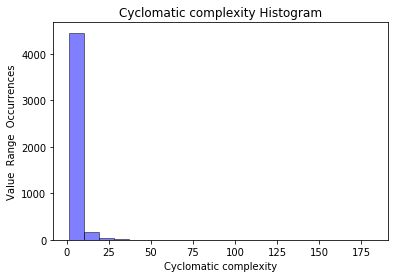

In [ ]:
display_numeric_col_hist(code_df['cyclomatic_complexity'], 'Cyclomatic complexity')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0d93270ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0d9327d208>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0d93270978>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0d9327d898>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0d9327dbe0>],
 'means': []}

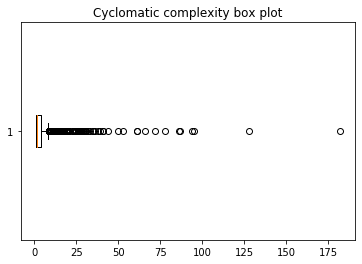

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Cyclomatic complexity box plot')
ax1.boxplot(code_df['cyclomatic_complexity'], vert=False)

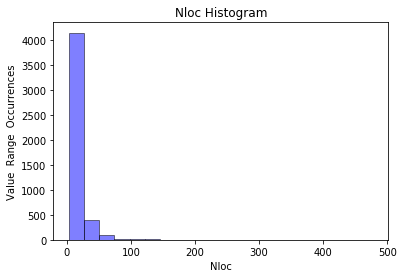

In [ ]:
display_numeric_col_hist(code_df['nloc'], 'Nloc')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0d931094a8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0d93109ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0d93109358>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0d93113278>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0d931135c0>],
 'means': []}

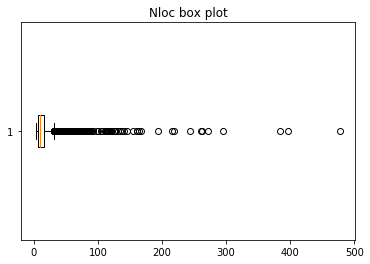

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Nloc box plot')
ax1.boxplot(code_df['nloc'], vert=False)

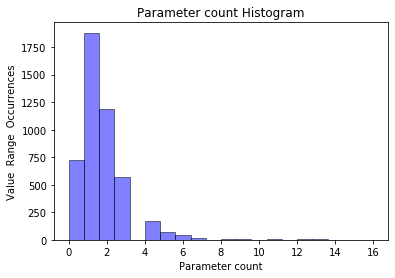

In [ ]:
display_numeric_col_hist(code_df['parameter_count'], 'Parameter count')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0d930defd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0d930ea6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0d93138320>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0d930ead30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0d930f60b8>],
 'means': []}

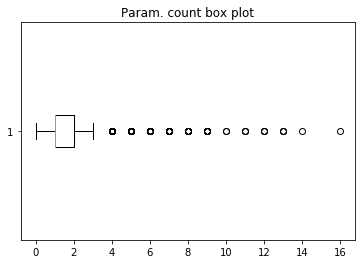

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Param. count box plot')
ax1.boxplot(code_df['parameter_count'], vert=False)

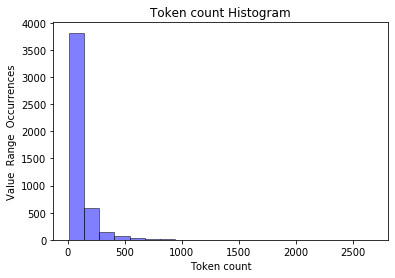

In [ ]:
display_numeric_col_hist(code_df['token_count'], 'Token count')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0d93047908>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0d93047f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0d93047588>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0d93055668>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0d930559b0>],
 'means': []}

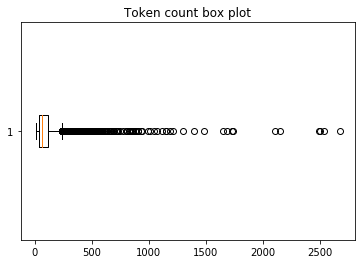

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Token count box plot')
ax1.boxplot(code_df['token_count'], vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0d932c35c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0d932c3c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0d932c3240>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0d932cc358>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0d932cc6a0>],
 'means': []}

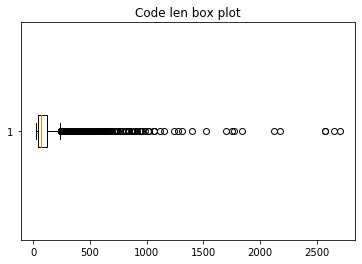

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Code len box plot')
ax1.boxplot(code_df['code_len'], vert=False)

In [ ]:
code_df.shape

(4697, 9)

In [ ]:
code_df[['cyclomatic_complexity', 'nloc', 'token_count', 'parameter_count']].corr()

,cyclomatic_complexity,nloc,token_count,parameter_count
cyclomatic_complexity,1.000000,0.884579,0.848237,0.039674
nloc,0.884579,1.000000,0.948441,0.076593
token_count,0.848237,0.948441,1.000000,0.124464
parameter_count,0.039674,0.076593,0.124464,1.000000


In [ ]:
java_code_df.shape

code_df = add_method_mccabe_metrics_to_code_df(java_code_df, 'code')

code_df.shape

code_df.head()

code_df.describe()

display_numeric_col_hist(code_df['cyclomatic_complexity'], 'Cyclomatic complexity')

fig1, ax1 = plt.subplots()
ax1.set_title('Cyclomatic complexity box plot')
ax1.boxplot(code_df['cyclomatic_complexity'], vert=False)

display_numeric_col_hist(code_df['nloc'], 'Nloc')

fig1, ax1 = plt.subplots()
ax1.set_title('Nloc box plot')
ax1.boxplot(code_df['nloc'], vert=False)

display_numeric_col_hist(code_df['parameter_count'], 'Parameter count')

fig1, ax1 = plt.subplots()
ax1.set_title('Param. count box plot')
ax1.boxplot(code_df['parameter_count'], vert=False)

display_numeric_col_hist(code_df['token_count'], 'Token count')

fig1, ax1 = plt.subplots()
ax1.set_title('Token count box plot')
ax1.boxplot(code_df['token_count'], vert=False)

fig1, ax1 = plt.subplots()
ax1.set_title('Code len box plot')
ax1.boxplot(code_df['code_len'], vert=False)

code_df.shape

code_df[['cyclomatic_complexity', 'nloc', 'token_count', 'parameter_count']].corr()

In [ ]:
java_code_df.shape

(4697, 4)

In [ ]:
code_df = add_method_mccabe_metrics_to_code_df(java_code_df, 'code')

In [ ]:
code_df.shape

(4697, 9)

In [ ]:
code_df.head()

,code,code_tokens,code_len,data_type,cyclomatic_complexity,nloc,parameter_count,method_name,token_count
348,"protected void unsetAuthDataService(ServiceReference<AuthDataService> ref) {\n if (TraceComponent.isAnyTracingEnabled() && tc.isDebugEnabled())\n Tr.debug(tc, ""unsetAuthDataService"", ref);\n authDataServiceRef.unsetReference(ref);\n }","[protected, void, unsetAuthDataService, (, ServiceReference, <, AuthDataService, >, ref, ), {, if, (, TraceComponent, ., isAnyTracingEnabled, (, ), &&, tc, ., isDebugEnabled, (, ), ), Tr, ., debug, (, tc, ,, ""unsetAuthDataService"", ,, ref, ), ;, authDataServiceRef, ., unsetReference, (, ref, ), ...",44,src,3,5,1,unsetAuthDataService,42
5389,"@Override\n protected void deltaStartWorkAccepted()\n {\n if (trace)\n log.trace(""deltaStartWorkAccepted"");\n\n super.deltaStartWorkAccepted();\n\n if (distributedStatisticsEnabled && distributedStatistics != null && transport != null)\n {\n try\n ...","[@, Override, protected, void, deltaStartWorkAccepted, (, ), {, if, (, trace, ), log, ., trace, (, ""deltaStartWorkAccepted"", ), ;, super, ., deltaStartWorkAccepted, (, ), ;, if, (, distributedStatisticsEnabled, &&, distributedStatistics, !=, null, &&, transport, !=, null, ), {, try, {, checkTran...",75,src,6,18,0,deltaStartWorkAccepted,71
10500,"private void validateBlockSize(byte[] descriptor) throws IOException {\n int blockSize = Util.getUInt16Both(descriptor, 129);\n if (blockSize != Constants.DEFAULT_BLOCK_SIZE) {\n throw new LoopFileSystemException(""Invalid block size: "" + blockSize);\n }\n }","[private, void, validateBlockSize, (, byte, [, ], descriptor, ), throws, IOException, {, int, blockSize, =, Util, ., getUInt16Both, (, descriptor, ,, 129, ), ;, if, (, blockSize, !=, Constants, ., DEFAULT_BLOCK_SIZE, ), {, throw, new, LoopFileSystemException, (, ""Invalid block size: "", +, blockS...",44,src,2,6,1,validateBlockSize,42
7146,public PooledConnection getConnection(long wait) throws SQLException {\r\n\t\ttry {\r\n\t\t\treturn getConnectionDirect();\r\n\t\t} catch (Exception e) {\r\n\t\t\tThreadUtil.sleep(wait);\r\n\t\t}\r\n\t\treturn getConnectionDirect();\r\n\t},"[public, PooledConnection, getConnection, (, long, wait, ), throws, SQLException, {, try, {, return, getConnectionDirect, (, ), ;, }, catch, (, Exception, e, ), {, ThreadUtil, ., sleep, (, wait, ), ;, }, return, getConnectionDirect, (, ), ;, }]",38,src,2,8,1,getConnection,36
14642,"public boolean addSnomedId(final Candidate candidate) throws SQLException {\n final SnomedTerm result = findFromCuiAndDesc(candidate.getCandidateCUI(), candidate.getCandidatePreferred());\n if (result != null) {\n candidate.setSnomedId(result.snomedId);\n cand...","[public, boolean, addSnomedId, (, final, Candidate, candidate, ), throws, SQLException, {, final, SnomedTerm, result, =, findFromCuiAndDesc, (, candidate, ., getCandidateCUI, (, ), ,, candidate, ., getCandidatePreferred, (, ), ), ;, if, (, result, !=, null, ), {, candidate, ., setSnomedId, (, re...",88,src,2,13,1,addSnomedId,85


In [ ]:
code_df.describe()

,code_len,cyclomatic_complexity,nloc,parameter_count,token_count
count,4697.000000,4697.000000,4697.000000,4697.000000,4697.000000
mean,109.542048,3.700660,14.520971,1.637215,104.443049
std,155.926177,6.155238,20.915982,1.399517,152.802563
min,22.000000,1.000000,3.000000,0.000000,8.000000
25%,42.000000,1.000000,6.000000,1.000000,37.000000
50%,65.000000,2.000000,9.000000,1.000000,61.000000
75%,121.000000,4.000000,16.000000,2.000000,117.000000
max,2707.000000,182.000000,478.000000,16.000000,2678.000000


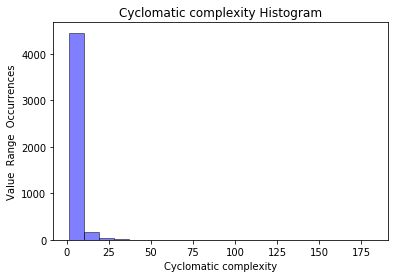

In [ ]:
display_numeric_col_hist(code_df['cyclomatic_complexity'], 'Cyclomatic complexity')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0d93270ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0d9327d208>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0d93270978>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0d9327d898>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0d9327dbe0>],
 'means': []}

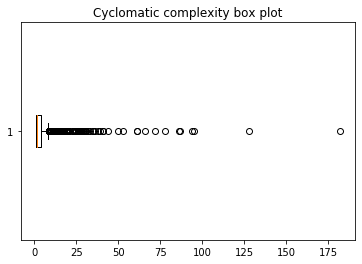

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Cyclomatic complexity box plot')
ax1.boxplot(code_df['cyclomatic_complexity'], vert=False)

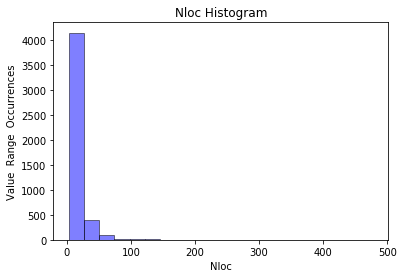

In [ ]:
display_numeric_col_hist(code_df['nloc'], 'Nloc')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0d931094a8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0d93109ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0d93109358>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0d93113278>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0d931135c0>],
 'means': []}

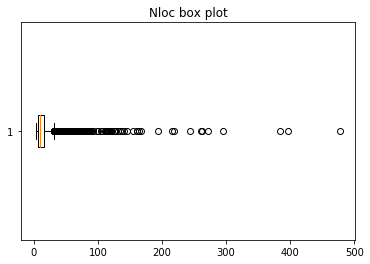

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Nloc box plot')
ax1.boxplot(code_df['nloc'], vert=False)

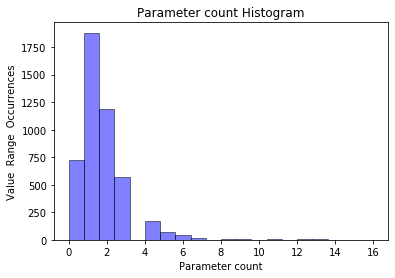

In [ ]:
display_numeric_col_hist(code_df['parameter_count'], 'Parameter count')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0d930defd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0d930ea6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0d93138320>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0d930ead30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0d930f60b8>],
 'means': []}

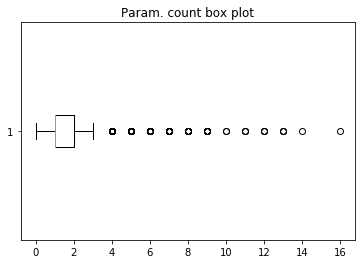

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Param. count box plot')
ax1.boxplot(code_df['parameter_count'], vert=False)

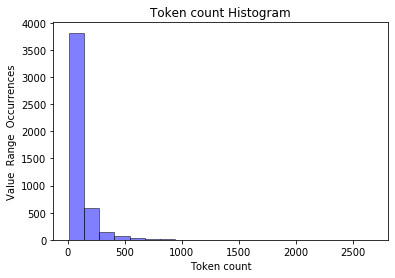

In [ ]:
display_numeric_col_hist(code_df['token_count'], 'Token count')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0d93047908>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0d93047f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0d93047588>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0d93055668>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0d930559b0>],
 'means': []}

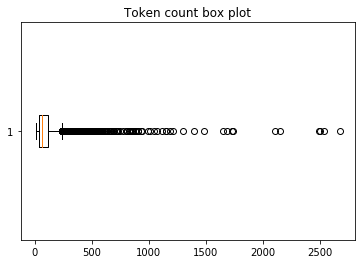

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Token count box plot')
ax1.boxplot(code_df['token_count'], vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0d932c35c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0d932c3c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0d932c3240>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0d932cc358>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0d932cc6a0>],
 'means': []}

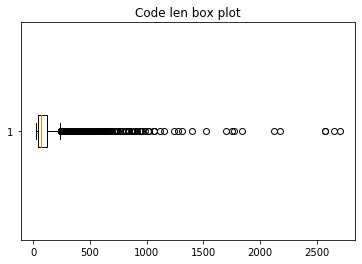

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Code len box plot')
ax1.boxplot(code_df['code_len'], vert=False)

In [ ]:
code_df.shape

(4697, 9)

In [ ]:
code_df[['cyclomatic_complexity', 'nloc', 'token_count', 'parameter_count']].corr()

,cyclomatic_complexity,nloc,token_count,parameter_count
cyclomatic_complexity,1.000000,0.884579,0.848237,0.039674
nloc,0.884579,1.000000,0.948441,0.076593
token_count,0.848237,0.948441,1.000000,0.124464
parameter_count,0.039674,0.076593,0.124464,1.000000


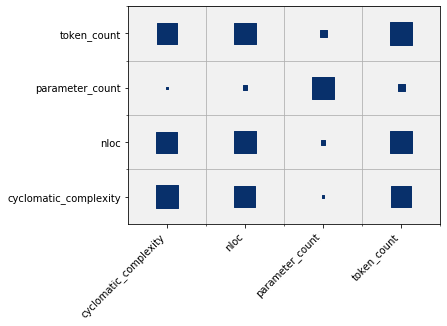

In [ ]:
columns = ['cyclomatic_complexity', 'nloc', 'token_count', 'parameter_count']
corr = code_df[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)